In [1]:
import numpy as np
import matplotlib.pyplot as plt

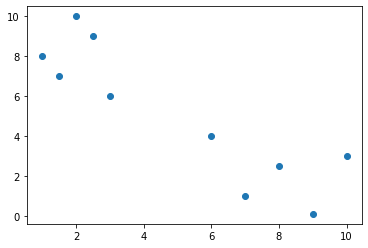

In [2]:
X = np.array([[7, 1], [3, 6], [2.5, 9], [9, 0.1], [1, 8], [8, 2.5], [2, 10], [1.5, 7], [6, 4], [10, 3]])
plt.scatter(X[:, 0], X[:, 1])
plt.show()

In [3]:
class KMeans:
    '''This class implements the K-Means Clustering Algorithm.'''
    def __init__(self, n_clusters = 8, max_iter = 300):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
    
    def fit(self, X):
        #initialize k means randomly
        self.means = []
        for i in range(self.n_clusters):
            self.means.append(X[i])
        
        #for max_iter times
        #1. assign data points to the k clusters
        #2. calculate the k new clusters
        for i in range(self.max_iter):
            clusters = []
            for j in range(self.n_clusters):
                clusters.append([])
            
            #1. assign data points to the k clusters
            self.labels_ = []
            for p in X:
                distances = np.array([((p - centroid)**2).sum() for centroid in self.means])
                nearest_cluster = np.argmin(distances)
                clusters[nearest_cluster].append(p)
                self.labels_.append(nearest_cluster)
                
            #2. calculate the k new clusters
            flag = False
            for j in range(self.n_clusters):
                new_mean = np.average(clusters[j], axis = 0) 
                if(not(np.array_equal(self.means[j], new_mean))):
                    flag = True
                    self.means[j] = new_mean
            if(not flag):
                break
        self.cluster_centers_ = np.array(self.means)
         
    def predict(self, X):
        predictions = []
        for p in X:
            distances = np.array([((p - centroid)**2).sum() for centroid in self.means])
            nearest_cluster = np.argmin(distances)
            predictions.append(nearest_cluster)
        return predictions

In [4]:
kmeans = KMeans(n_clusters = 2)
kmeans.fit(X)
centroids = kmeans.cluster_centers_
labels = kmeans.labels_
print('Final Centroids: \n', centroids)
print('Final Labels: ', labels)

Final Centroids: 
 [[8.   2.12]
 [2.   8.  ]]
Final Labels:  [0, 1, 1, 0, 1, 0, 1, 1, 0, 0]


In [5]:
predictions = kmeans.predict(X)
print(predictions)

[0, 1, 1, 0, 1, 0, 1, 1, 0, 0]


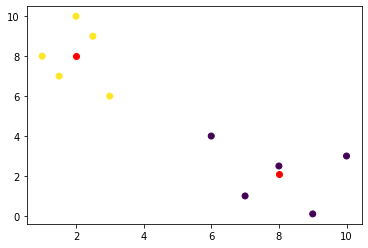

In [6]:
plt.scatter(X[:, 0], X[:, 1], c = labels)
plt.scatter(centroids[:, 0], centroids[:, 1], c = 'r')
plt.show()